# Tugas Case-Based 3: Ensemble Learning Tugas Tipe 2

**IF-44-01**
1.   MUHAMMAD RAFI ANDEO PRAJA (1301200278)
2.   M NAUFAL RIFQI RAMDHANI (1301201572)
3.   RIZKY FERDIAN PRASETYO (1301204229)
4.   BAGUS PANULUH (1301204312)



# Pre-Processing

In [ ]:
# Melakukan import berbagai library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Pembacaan Dataset file csv
data = pd.read_csv('https://raw.githubusercontent.com/BagusPanuluh/EnsembleLearning/main/autos_mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# Melihat informasi dari setiap atribut seperti tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Replace ? dengan NaN value. (Missing value apda dataset ditandai dengan '?')
count=0
for i in range(0,398):
    for j in range(0,9):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
data = data.replace('?', np.NaN)

6


Text(0, 0.5, 'Count of NaN')

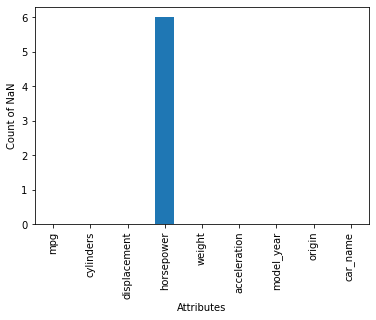

In [ ]:
# Graphic Missing Value (NaN)
pd.isnull(data).sum().plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [ ]:
# Jumlah Missing Value (NaN) di tiap Atribut
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
# Replace NaN dengan nilai rata-rata (mean) dari atribut horsepower
horsePower = pd.to_numeric(data['horsepower'], errors='coerce').mean().astype(int)
print(horsePower)
data['horsepower'].replace([np.NaN], round(horsePower), inplace=True)

# Ubah tipe data atribut horsepower yang awalnya object menjadi numerik
data['horsepower'] = pd.to_numeric(data['horsepower'])

104


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


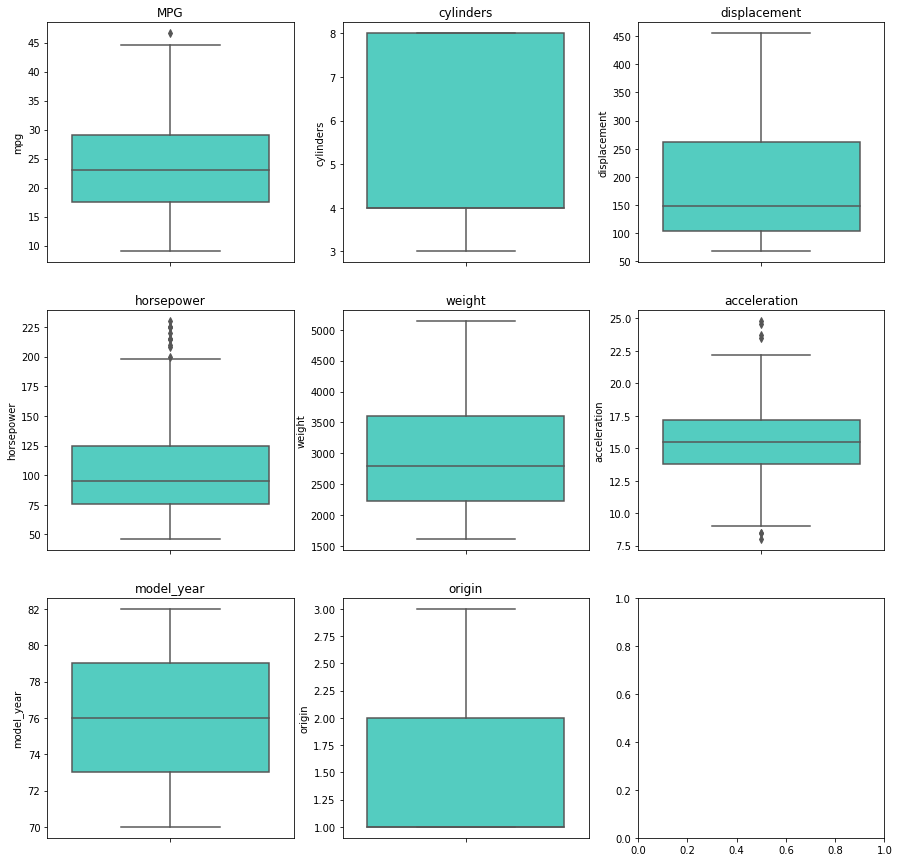

In [ ]:
# Grafik Boxplot untuk Outliers Checking di tiap atribut
fig, axe = plt.subplots(3, 3, figsize=(15, 15))

axe[0, 0].set_title('MPG')
box = sns.boxplot(y=data['mpg'], ax=axe[0, 0], color='turquoise')

axe[0, 1].set_title('cylinders')
box = sns.boxplot(y=data['cylinders'], ax=axe[0, 1], color='turquoise')

axe[0, 2].set_title('displacement')
box = sns.boxplot(y=data['displacement'], ax=axe[0, 2], color='turquoise')

axe[1, 0].set_title('horsepower')
box = sns.boxplot(y=data['horsepower'], ax=axe[1, 0], color='turquoise')

axe[1, 1].set_title('weight')
box = sns.boxplot(y=data['weight'], ax=axe[1, 1], color='turquoise')

axe[1, 2].set_title('acceleration')
box = sns.boxplot(y=data['acceleration'], ax=axe[1, 2], color='turquoise')

axe[2, 0].set_title('model_year')
box = sns.boxplot(y=data['model_year'], ax=axe[2, 0], color='turquoise')

axe[2, 1].set_title('origin')
box = sns.boxplot(y=data['origin'], ax=axe[2, 1], color='turquoise')

plt.show()

In [ ]:
# Cek unique values dan duplicate values di atribut car_name
print("data Unique atribut car_name: ", data['car_name'].nunique())
print("Data duplikat atribut car_name: ", data['car_name'].duplicated().sum())

data Unique atribut car_name:  305
Data duplikat atribut car_name:  93


In [ ]:
# Pilih atribut selain car_name karena car_name mengandung unique values yang banyak
to_keep = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
# Menghilangkan atribut car_name dari dataset
df = data[to_keep]

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
# SPlitting Data ke Data Train & Test dengan X=berisi atribut penentu regresi(prediktor) dan y=berisi target hasil regresi
# Data train=80% dan data test=20%
x = df.drop(['mpg'], axis=1)
y = df['mpg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('Jumlah train data: ', len(x_train))
print('Jumlah test data: ', len(x_test))

Jumlah train data:  318
Jumlah test data:  80


In [ ]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
298,8,350.0,125,3900,17.4,79,1
13,8,455.0,225,3086,10.0,70,1
376,4,91.0,68,2025,18.2,82,3
61,4,122.0,86,2226,16.5,72,1
346,4,97.0,67,2065,17.8,81,3
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
255,4,140.0,88,2720,15.4,78,1
72,8,304.0,150,3892,12.5,72,1
235,4,97.0,75,2265,18.2,77,3


In [ ]:
# Scaling dengan RobustScaler karena cocok untuk dataset yang memiliki outlier.
# Range values pada tiap tribut berbeda-beda sehingga digunakan scaling untuk menyamakan range values pada tiap atribut
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Menampilkan 5 data teratas setelah scaling
print("x_train : \n", x_train[:5])
print("x_test : \n", x_test[:5])


x_train : 
 [[ 2.          1.3056      0.67777778  0.83701447  0.55882353  0.5
   0.        ]
 [ 2.          1.9776      2.9         0.21706017 -1.61764706 -1.
   0.        ]
 [ 0.         -0.352      -0.58888889 -0.59101295  0.79411765  1.
   2.        ]
 [ 0.         -0.1536     -0.18888889 -0.43792841  0.29411765 -0.66666667
   0.        ]
 [ 0.         -0.3136     -0.61111111 -0.56054836  0.67647059  0.83333333
   2.        ]]
x_test : 
 [[ 1.          0.16        0.05555556  0.13937548 -0.29411765 -0.16666667
   0.        ]
 [ 0.         -0.032      -0.32222222  0.32673267  1.44117647  0.83333333
   1.        ]
 [ 2.          1.1008      1.01111111  0.71134806 -0.67647059  0.33333333
   0.        ]
 [ 0.5        -0.096       0.18888889  0.02208682  0.11764706  0.33333333
   1.        ]
 [ 1.          0.5504     -0.1         0.35338919  0.79411765  0.5
   0.        ]]


# Pemodelan

In [ ]:
# Membuat model Decision Tree sebagai model dasar atau base-estimator
base = DecisionTreeRegressor(max_depth=4)

# Membuat model AdaBoost Regressor untuk ensemble learning dengan base_estimator adalah model Decision Tree yang dibuat sebelumnya
# AdaBoost digunakan untuk menaikkan akurasi model
adaBoost = AdaBoostRegressor(base_estimator=base, n_estimators=100, learning_rate=1.0)

In [ ]:
# Melakukan Fitting atau Training Data
adaBoost.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100)

In [ ]:
# Membuat Prediksi Regresi dari Test Data berdasarkan model AdaBoost
predictions = adaBoost.predict(x_test)
pred = np.round(predictions, 1)
print(pred)

[21.  27.9 17.4 23.2 20.6 15.6 29.2 35.1 17.8 13.1 30.1 19.4 18.6 23.9
 35.5 22.1 13.1 19.4 12.6 39.9 23.5 30.3 21.3 24.7 27.7 28.  33.9 39.9
 15.3 28.  26.8 13.1 22.2 23.7 23.2 14.  26.2 12.6 32.8 23.5 26.3 23.2
 18.  33.9 26.2 19.2 19.5 14.2 26.8 18.4 24.7 26.2 15.1 14.3 30.6 23.2
 12.6 14.4 30.3 35.1 34.2 35.  15.7 26.8 17.7 33.9 26.9 24.3 31.6 14.4
 17.8 23.2 14.5 26.2 14.4 26.8 30.1 15.7 14.  25.3]


# Evaluasi

In [ ]:
# Melakukan Evaluasi dengan R2 Score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R2 Score: {round(r2, 3)*100}%')

R2 Score: 89.2%
